In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline



In [2]:
olimpic = pd.read_csv('./olimpic_medals.csv', names=['City','Edition','Sport','Discipline','Athlete','NOC','Gender','Event','Event_gender','Medal'])

In [3]:
olimpic_by_year = olimpic.set_index('Edition')


In [4]:
olimpic_by_year

,City,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
Edition,,,,,,,,,
Edition,City,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
...,...,...,...,...,...,...,...,...,...
2008,Beijing,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
2008,Beijing,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
2008,Beijing,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze


In [11]:
#1 Сколько медалей выиграл Jesse Owens в 1936?
len(olimpic_by_year[olimpic_by_year.Athlete.str.contains('OWENS, Jesse')].loc['1936'])
len(olimpic[(olimpic.Edition == '1936') & (olimpic.Athlete.str.contains('OWENS, Jesse'))])

4

In [15]:
#2 Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?
olimpic[(olimpic.Discipline == 'Badminton') & 
        (olimpic.Gender == 'Men') & 
        (olimpic.Medal == 'Gold')].NOC.value_counts()[0:1] #TODO

INA    8
Name: NOC, dtype: int64

In [16]:
#3  Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?
olimpic_by_year.loc['1984':'2008'].NOC.value_counts()[0:3]


USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

In [17]:
#4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша.
#Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.
olimpic[(olimpic.Event == '100m') & 
        (olimpic.Event_gender == 'M') & 
        (olimpic.Medal == 'Gold')].sort_values(by='Edition', ascending=False).loc[:,['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27553,Beijing,2008,"BOLT, Usain",JAM
25540,Athens,2004,"GATLIN, Justin",USA
23522,Sydney,2000,"GREENE, Maurice",USA
21599,Atlanta,1996,"BAILEY, Donovan",CAN
19860,Barcelona,1992,"CHRISTIE, Linford",GBR
18285,Seoul,1988,"LEWIS, Carl",USA
16795,Los Angeles,1984,"LEWIS, Carl",USA
15375,Moscow,1980,"WELLS, Allan",GBR
14070,Montreal,1976,"CRAWFORD, Hasely",TRI
12903,Munich,1972,"BORZOV, Valery",URS


In [18]:
#5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много
#золотых, серебрянных и бронзовых медалей было выйграно каждым полом?
olimpic.groupby('Gender')['Medal'].value_counts()

Gender  Medal 
Gender  Medal        1
Men     Gold      7365
        Silver    7181
        Bronze    7175
Women   Bronze    2514
        Silver    2496
        Gold      2485
Name: Medal, dtype: int64

Text(0, 0.5, 'Medals')

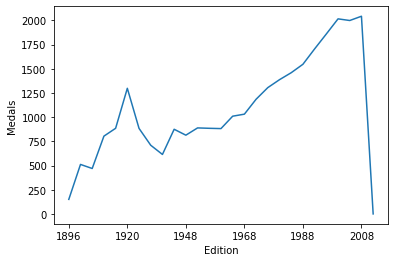

In [19]:
#6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.
olimpic.groupby('Edition').Medal.count().plot()
pp.ylabel('Medals')


7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей
истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней
заработанной медали.


In [25]:
olimpic.groupby('NOC').agg({'Edition': ['min', 'max'], 'Medal': 'count'
})

Edition       Medal
        min   max count
NOC                    
AFG    2008  2008     1
AHO    1988  1988     1
ALG    1984  2008    14
ANZ    1908  1912    29
ARG    1924  2008   239
..      ...   ...   ...
VIE    2000  2008     2
YUG    1924  2000   435
ZAM    1984  1996     2
ZIM    1980  2008    23
ZZX    1896  1904    48

[139 rows x 3 columns]

8. Атлеты выигравшие медали в Beijing на дистанции 100m или 200m

In [28]:
olimpic[((olimpic.Event == '100m') | (olimpic.Event == '200m')) & 
        (olimpic.City == 'Beijing')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27552,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze
27553,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27554,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver
27555,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold
27556,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver
27557,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,W,Silver
27570,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,M,Bronze
27571,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27572,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Silver
27573,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,W,Bronze


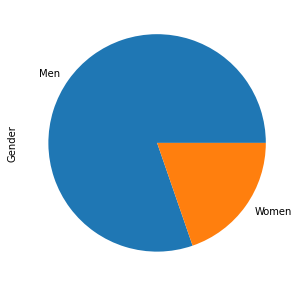

In [29]:
#9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.
olimpic[(olimpic.Sport == 'Athletics') & 
        (olimpic.NOC == 'USA') &
        (olimpic.Medal == 'Gold')].Gender.value_counts().plot.pie(figsize=(5, 5)) 


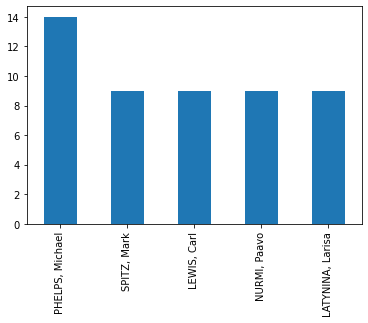

In [31]:
#10. Постройте график 5 атлетов которые выйграли большинство золотых медалей.
olimpic[(olimpic.Medal == 'Gold')].Athlete.value_counts()[0:5].plot.bar()

In [293]:
#11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.
olimpic[(olimpic.Edition == olimpic.Edition.max())].Medal.count()
olimpic[(olimpic.Edition == olimpic.Edition.max())].NOC.value_counts()

USA    315
CHN    184
AUS    149
RUS    143
GER    101
KOR     78
GBR     77
FRA     76
BRA     75
ESP     71
NED     62
JPN     51
ARG     51
CUB     47
ITA     42
CAN     34
UKR     31
BLR     30
HUN     27
NGR     24
ROU     22
NOR     22
POL     20
DEN     18
JAM     17
SRB     15
KEN     14
ISL     14
NZL     14
KAZ     13
SUI     11
SVK     10
TUR      8
AZE      7
CZE      7
ETH      7
INA      7
SWE      7
GRE      7
GEO      6
PRK      6
ARM      6
UZB      6
BEL      5
BAH      5
SLO      5
LTU      5
CRO      5
TRI      5
FIN      5
BUL      5
TPE      4
ZIM      4
THA      4
MGL      4
MEX      4
LAT      3
EST      3
AUT      3
IND      3
SIN      3
IRL      3
COL      2
ALG      2
POR      2
TJK      2
IRI      2
MAR      2
DOM      2
KGZ      2
MRI      1
TOG      1
TUN      1
EGY      1
VIE      1
CHI      1
AFG      1
CMR      1
PAN      1
MDA      1
VEN      1
SUD      1
MAS      1
ISR      1
RSA      1
ECU      1
Name: NOC, dtype: Int64

In [100]:
#12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год)
#по общему количеству медалей. Включите дисциплину атлета.
df = olimpic[(olimpic.NOC == 'USA')].groupby(['Edition','Athlete','Sport']).agg({'Medal': 'count'})
df.loc[df.groupby(['Edition'])['Medal'].idxmax()]

,,,Medal
Edition,Athlete,Sport,
1896,"GARRETT, Robert",Athletics,4
1900,"BAXTER, Irving",Athletics,5
1904,"DOWNING, Burton",Cycling,6
1908,"SHEPPARD, Melvin",Athletics,3
1912,"OSBURN, Carl Townsend",Shooting,4
1920,"LEE, Willis",Shooting,7
1924,"WEISSMULLER, Johnny",Aquatics,4
1928,"BARBUTI, Raymond James",Athletics,2
1932,"DIDRIKSON, Mildred",Athletics,3
